In [1]:
# philadelphia county FIPS = 101
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 100)
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import numpy as np
import mapclassify as mc
from census import Census
from us import states



In [2]:

c = Census("690ee7e861c656caf820a2a584c628bfd54375d0")




## 1. Downloading census variables of interest

2000 -- SF3¶

P087001 Total: Population for whom poverty status is determined
P087002 Total: Income in 1999 below poverty level:
P053001 Median household income in 1999 Households
2000 -- SF1

P009001 RACE:Total tallied
P009002 RACE:talllied:White or in comb w/ 1+ oth races
P009003 RACE:tallied:Bl/AfAm or in comb w/ 1+ oth races

H004001 TENURE:Housing Units:Total
H004003 TENURE:Housing Units:Renter occupied
maybe:
H003001 OCCUPANCY STATUS:Housing Units:Total
H003003 OCCUPANCY STATUS:Housing Units:Vacant
2010 -- SF1

P006001 Total races tallied
P006002 Total races tallied!!White alone or in combination with one or more other races
P006003 Total races tallied!!Black or African American alone or in combination with one or more other races

H004001 Total
H004004 Total!!Renter occupied

maybe:
H003001 Total
H003003 Total!!Vacant
2012 -- ACS 5year

B17001_001E Estimate!!Total (POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE)
B17001_002E Estimate!!Total!!Income in the past 12 months below poverty level

B19013_001E Estimate!!Median household income in the past 12 months (in 2012 inflation-adjusted dollars)


In [3]:
c.acs5.tables(year=2012)

[{'name': 'B17015',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY SOCIAL SECURITY INCOME BY SUPPLEMENTAL SECURITY INCOME (SSI) AND CASH PUBLIC ASSISTANCE INCOME',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B17015.json'},
 {'name': 'B18104',
  'description': 'SEX BY AGE BY COGNITIVE DIFFICULTY',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B18104.json'},
 {'name': 'B17016',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY WORK EXPERIENCE OF HOUSEHOLDER AND SPOUSE',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B17016.json'},
 {'name': 'B18105',
  'description': 'SEX BY AGE BY AMBULATORY DIFFICULTY',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/groups/B18105.json'},
 {'name': 'B17017',
  'description': 'POVERTY STATUS IN THE PAST 12 MONTHS BY HOUSEHOLD TYPE BY AGE OF HOUSEHOLDER',
  'variables': 'https://api.census.gov/data/2012/acs/acs5/gro

In [29]:
c.sf1.tables(year=2000)


[{'name': 'P027',
  'description': 'RELATIONSHIP BY HOUSEHOLD TYPE (INCLUDING LIVING ALONE) [27]',
  'variables': 'https://api.census.gov/data/2000/dec/sf1/groups/P027.json'},
 {'name': 'P026',
  'description': 'HOUSEHOLD TYPE BY HOUSEHOLD SIZE [16]',
  'variables': 'https://api.census.gov/data/2000/dec/sf1/groups/P026.json'},
 {'name': 'P013A',
  'description': 'MEDIAN AGE BY SEX (WHITE ALONE) [3]',
  'variables': 'https://api.census.gov/data/2000/dec/sf1/groups/P013A.json'},
 {'name': 'P029',
  'description': 'RELATIONSHIP BY AGE FOR THE POPULATION UNDER 18 YEARS [46]',
  'variables': 'https://api.census.gov/data/2000/dec/sf1/groups/P029.json'},
 {'name': 'P028',
  'description': 'RELATIONSHIP BY HOUSEHOLD TYPE FOR THE POPULATION UNDER 18 YEARS [17]',
  'variables': 'https://api.census.gov/data/2000/dec/sf1/groups/P028.json'},
 {'name': 'P023',
  'description': 'HOUSEHOLDS BY PRESENCE OF PEOPLE 65 YEARS AND OVER, HOUSEHOLD SIZE, AND HOUSEHOLD TYPE [11]',
  'variables': 'https://api.c

In [55]:
# 2012 ACS 5 year
poverty_income_2012 = c.acs5.get(("B17001_001E","B17001_002E","B19013_001E"),geo={'for':'tract:*','in':'state:{} county:101'.format(states.PA.fips)},year=2012)

# 2010 SF1
pop_race_housing_2010 = c.sf1.get(("P006001",'P006002','P006003','H004001','H004004','H003001','H003003'),geo={'for':'tract:*','in':'state:{} county:101'.format(states.PA.fips)},year=2010)

# # 2000 SF1
pop_race_housing_2000 = c.sf1.get(("P009001",'P009002','P009003','H004001','H004003','H003001','H003003'),geo={'for':'tract:*',
                                       'in':'state:{} county:101'.format(states.PA.fips)},year=2000)
# # 2000 SF3
poverty_income_2000 = pd.read_json("https://api.census.gov/data/2000/dec/sf3?get=P087001,P087002,P053001,NAME&for=tract:*&in=state:42&in=county:101")
poverty_income_2000.columns = poverty_income_2000.iloc[0]


#poverty_income_2000 = c.sf3.get(("P087001",'P087002','P053001'),geo={'for':'tract:*',                                                                
#                                       'in':'state:{} county:101'.format(states.PA.fips)},year=2000)
    

In [56]:
pop_race_housing_2000


[{'P009001': 2705.0,
  'P009002': 2165.0,
  'P009003': 354.0,
  'H004001': 1748.0,
  'H004003': 1348.0,
  'H003001': 1900.0,
  'H003003': 152.0,
  'state': '42',
  'county': '101',
  'tract': '0001'},
 {'P009001': 1400.0,
  'P009002': 176.0,
  'P009003': 82.0,
  'H004001': 459.0,
  'H004003': 374.0,
  'H003001': 509.0,
  'H003003': 50.0,
  'state': '42',
  'county': '101',
  'tract': '0002'},
 {'P009001': 2663.0,
  'P009002': 1926.0,
  'P009003': 399.0,
  'H004001': 1239.0,
  'H004003': 861.0,
  'H003001': 1392.0,
  'H003003': 153.0,
  'state': '42',
  'county': '101',
  'tract': '0003'},
 {'P009001': 4399.0,
  'P009002': 3328.0,
  'P009003': 571.0,
  'H004001': 2999.0,
  'H004003': 1780.0,
  'H003001': 3268.0,
  'H003003': 269.0,
  'state': '42',
  'county': '101',
  'tract': '0004'},
 {'P009001': 1143.0,
  'P009002': 629.0,
  'P009003': 332.0,
  'H004001': 280.0,
  'H004003': 274.0,
  'H003001': 373.0,
  'H003003': 93.0,
  'state': '42',
  'county': '101',
  'tract': '0005'},
 {'P009

In [57]:
poverty_income_2000


,P087001,P087002,P053001,NAME,state,county,tract
0,P087001,P087002,P053001,NAME,state,county,tract
1,2409,223,48886,"Census Tract 1, Philadelphia County, Pennsylvania",42,101,0001
2,1223,690,8349,"Census Tract 2, Philadelphia County, Pennsylvania",42,101,0002
3,1941,236,40625,"Census Tract 3, Philadelphia County, Pennsylvania",42,101,0003
4,3944,666,27400,"Census Tract 4, Philadelphia County, Pennsylvania",42,101,0004
...,...,...,...,...,...,...,...
377,3741,218,47995,"Census Tract 363.02, Philadelphia County, Penn...",42,101,036302
378,7092,345,53614,"Census Tract 363.03, Philadelphia County, Penn...",42,101,036303
379,35,0,51250,"Census Tract 364, Philadelphia County, Pennsyl...",42,101,0364
380,9273,651,50447,"Census Tract 365, Philadelphia County, Pennsyl...",42,101,0365


In [58]:
# converting all dictionaries (format on download) to dataframes
poverty_income_2012_pd = pd.DataFrame(poverty_income_2012)
pop_race_housing_2010_pd = pd.DataFrame(pop_race_housing_2010)
pop_race_housing_2000_pd = pd.DataFrame(pop_race_housing_2000)
poverty_income_2000_pd = pd.DataFrame(poverty_income_2000)


In [59]:
# defining columns names with descriptive headers
sf32000_cols = {'P087001':'pop_tot_pov','P087002':'in_poverty','P053001':'median_hh'}
sf12000_cols = {'P009001':'pop_tot_race','P009002':'white_tot','P009003':'black_tot',
                'H004001':'housing_units_occ','H004003':'housing_renters',
                'H003001':'housing_units_tot','H003003':'housing_units_vac'}

acs2012_cols = {'B17001_001E':'pop_tot_pov','B17001_002E':'in_poverty','B19013_001E':'median_hh'}
sf12010_cols = {'P006001':'pop_tot_race','P006002':'white_tot','P006003':'black_tot',
                'H004001':'housing_units_occ','H004004':'housing_renters',
                'H003001':'housing_units_tot','H003003':'housing_units_vac'}

In [60]:
# renaming columns based on descriptive headers
poverty_income_2012_pd = poverty_income_2012_pd.rename(columns = acs2012_cols)
pop_race_housing_2010_pd = pop_race_housing_2010_pd.rename(columns =sf12010_cols)
pop_race_housing_2000_pd = pop_race_housing_2000_pd.rename(columns=sf12000_cols)
poverty_income_2000_pd = poverty_income_2000_pd.rename(columns = sf32000_cols)

In [61]:
poverty_income_2012_pd['median_hh'] = poverty_income_2012_pd.apply(
    lambda x: 1 if x['median_hh']==-666666666.0 else x['median_hh'],axis=1)

In [62]:
# combining census data for two year groups
#stats2000 = pop_race_housing_2000_pd


stats2000 = pop_race_housing_2000_pd.merge(poverty_income_2000_pd,how="left",left_on='tract', right_on='tract')
stats2010 = pop_race_housing_2010_pd.merge(poverty_income_2012_pd, how="left",left_on='tract',right_on='tract')

In [63]:
stats2000

,pop_tot_race,white_tot,black_tot,housing_units_occ,housing_renters,housing_units_tot,housing_units_vac,state_x,county_x,tract,pop_tot_pov,in_poverty,median_hh,NAME,state_y,county_y
0,2705.0,2165.0,354.0,1748.0,1348.0,1900.0,152.0,42,101,0001,2409,223,48886,"Census Tract 1, Philadelphia County, Pennsylvania",42,101
1,1400.0,176.0,82.0,459.0,374.0,509.0,50.0,42,101,0002,1223,690,8349,"Census Tract 2, Philadelphia County, Pennsylvania",42,101
2,2663.0,1926.0,399.0,1239.0,861.0,1392.0,153.0,42,101,0003,1941,236,40625,"Census Tract 3, Philadelphia County, Pennsylvania",42,101
3,4399.0,3328.0,571.0,2999.0,1780.0,3268.0,269.0,42,101,0004,3944,666,27400,"Census Tract 4, Philadelphia County, Pennsylvania",42,101
4,1143.0,629.0,332.0,280.0,274.0,373.0,93.0,42,101,0005,522,332,9620,"Census Tract 5, Philadelphia County, Pennsylvania",42,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3848.0,3037.0,554.0,1284.0,320.0,1344.0,60.0,42,101,036302,3741,218,47995,"Census Tract 363.02, Philadelphia County, Penn...",42,101
377,7193.0,6893.0,85.0,2459.0,183.0,2485.0,26.0,42,101,036303,7092,345,53614,"Census Tract 363.03, Philadelphia County, Penn...",42,101
378,312.0,205.0,86.0,14.0,2.0,18.0,4.0,42,101,0364,35,0,51250,"Census Tract 364, Philadelphia County, Pennsyl...",42,101
379,9587.0,8630.0,491.0,3627.0,1149.0,3745.0,118.0,42,101,0365,9273,651,50447,"Census Tract 365, Philadelphia County, Pennsyl...",42,101


In [64]:
stats2010


,pop_tot_race,white_tot,black_tot,housing_units_occ,housing_renters,housing_units_tot,housing_units_vac,state_x,county_x,tract,pop_tot_pov,in_poverty,median_hh,state_y,county_y
0,3562.0,3038.0,233.0,2301.0,1483.0,2696.0,395.0,42,101,000100,3183.0,484.0,75505.0,42,101
1,2989.0,746.0,316.0,1145.0,781.0,1285.0,140.0,42,101,000200,1877.0,227.0,49928.0,42,101
2,3262.0,2466.0,347.0,1855.0,1402.0,1968.0,113.0,42,101,000300,3136.0,438.0,71250.0,42,101
3,2201.0,1174.0,407.0,1584.0,1240.0,1790.0,206.0,42,101,000401,2287.0,630.0,30000.0,42,101
4,3184.0,2569.0,182.0,2273.0,887.0,2709.0,436.0,42,101,000402,3021.0,406.0,44805.0,42,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,101,980600,0.0,0.0,1.0,42,101
380,5.0,0.0,4.0,1.0,1.0,1.0,0.0,42,101,980700,0.0,0.0,1.0,42,101
381,11.0,5.0,2.0,4.0,3.0,4.0,0.0,42,101,980800,0.0,0.0,1.0,42,101
382,31.0,9.0,21.0,19.0,17.0,20.0,1.0,42,101,980900,4.0,0.0,1.0,42,101


In [65]:
# creating geoID fields 
stats2000['STFID']=stats2000["state_x"].astype(str) + stats2000[
    "county_x"].astype(str) + stats2000["tract"].astype(str)
stats2010['GEOID']=stats2010["state_x"].astype(str) + stats2010[
    "county_x"].astype(str) + stats2010["tract"].astype(str)

In [66]:
stats2010 = stats2010.drop(columns=['state_x','state_y','county_x','county_y','tract'])
stats2000 = stats2000.drop(columns=['state_x','state_y','county_x','county_y','tract'])

In [67]:
# calculating percentages

stats2000['per_white'] = stats2000['white_tot'].astype('int64')/stats2000['pop_tot_race'].astype('int64')
stats2000['per_black']= stats2000['black_tot'].astype('int64')/stats2000['pop_tot_race'].astype('int64')
stats2000['per_renters'] = stats2000['housing_renters'].astype('int64')/stats2000['housing_units_occ'].astype('int64')
stats2000['per_vacant']= stats2000['housing_units_vac'].astype('int64')/stats2000['housing_units_tot'].astype('int64')
stats2000['per_poverty']= stats2000['in_poverty'].astype('int64')/stats2000['pop_tot_pov'].astype('int64')

stats2010['per_white'] = stats2010['white_tot'].astype('int64')/stats2010['pop_tot_race'].astype('int64')
stats2010['per_black']= stats2010['black_tot'].astype('int64')/stats2010['pop_tot_race'].astype('int64')
stats2010['per_renters'] = stats2010['housing_renters'].astype('int64')/stats2010['housing_units_occ'].astype('int64')
stats2010['per_vacant']= stats2010['housing_units_vac'].astype('int64')/stats2010['housing_units_tot'].astype('int64')
stats2010['per_poverty']= stats2010['in_poverty'].astype('int64')/stats2010['pop_tot_pov'].astype('int64')

In [68]:
stats2000

,pop_tot_race,white_tot,black_tot,housing_units_occ,housing_renters,housing_units_tot,housing_units_vac,pop_tot_pov,in_poverty,median_hh,NAME,STFID,per_white,per_black,per_renters,per_vacant,per_poverty
0,2705.0,2165.0,354.0,1748.0,1348.0,1900.0,152.0,2409,223,48886,"Census Tract 1, Philadelphia County, Pennsylvania",421010001,0.800370,0.130869,0.771167,0.080000,0.092570
1,1400.0,176.0,82.0,459.0,374.0,509.0,50.0,1223,690,8349,"Census Tract 2, Philadelphia County, Pennsylvania",421010002,0.125714,0.058571,0.814815,0.098232,0.564186
2,2663.0,1926.0,399.0,1239.0,861.0,1392.0,153.0,1941,236,40625,"Census Tract 3, Philadelphia County, Pennsylvania",421010003,0.723244,0.149831,0.694915,0.109914,0.121587
3,4399.0,3328.0,571.0,2999.0,1780.0,3268.0,269.0,3944,666,27400,"Census Tract 4, Philadelphia County, Pennsylvania",421010004,0.756536,0.129802,0.593531,0.082313,0.168864
4,1143.0,629.0,332.0,280.0,274.0,373.0,93.0,522,332,9620,"Census Tract 5, Philadelphia County, Pennsylvania",421010005,0.550306,0.290464,0.978571,0.249330,0.636015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3848.0,3037.0,554.0,1284.0,320.0,1344.0,60.0,3741,218,47995,"Census Tract 363.02, Philadelphia County, Penn...",42101036302,0.789241,0.143971,0.249221,0.044643,0.058273
377,7193.0,6893.0,85.0,2459.0,183.0,2485.0,26.0,7092,345,53614,"Census Tract 363.03, Philadelphia County, Penn...",42101036303,0.958293,0.011817,0.074420,0.010463,0.048646
378,312.0,205.0,86.0,14.0,2.0,18.0,4.0,35,0,51250,"Census Tract 364, Philadelphia County, Pennsyl...",421010364,0.657051,0.275641,0.142857,0.222222,0.000000
379,9587.0,8630.0,491.0,3627.0,1149.0,3745.0,118.0,9273,651,50447,"Census Tract 365, Philadelphia County, Pennsyl...",421010365,0.900177,0.051215,0.316791,0.031509,0.070204


In [69]:
stats2010

,pop_tot_race,white_tot,black_tot,housing_units_occ,housing_renters,housing_units_tot,housing_units_vac,pop_tot_pov,in_poverty,median_hh,GEOID,per_white,per_black,per_renters,per_vacant,per_poverty
0,3562.0,3038.0,233.0,2301.0,1483.0,2696.0,395.0,3183.0,484.0,75505.0,42101000100,0.852892,0.065413,0.644502,0.146513,0.152058
1,2989.0,746.0,316.0,1145.0,781.0,1285.0,140.0,1877.0,227.0,49928.0,42101000200,0.249582,0.105721,0.682096,0.108949,0.120938
2,3262.0,2466.0,347.0,1855.0,1402.0,1968.0,113.0,3136.0,438.0,71250.0,42101000300,0.755978,0.106376,0.755795,0.057419,0.139668
3,2201.0,1174.0,407.0,1584.0,1240.0,1790.0,206.0,2287.0,630.0,30000.0,42101000401,0.533394,0.184916,0.782828,0.115084,0.275470
4,3184.0,2569.0,182.0,2273.0,887.0,2709.0,436.0,3021.0,406.0,44805.0,42101000402,0.806847,0.057161,0.390233,0.160945,0.134393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42101980600,NaN,NaN,NaN,NaN,NaN
380,5.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,42101980700,0.000000,0.800000,1.000000,0.000000,NaN
381,11.0,5.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,1.0,42101980800,0.454545,0.181818,0.750000,0.000000,NaN
382,31.0,9.0,21.0,19.0,17.0,20.0,1.0,4.0,0.0,1.0,42101980900,0.290323,0.677419,0.894737,0.050000,0.000000



## 3. loading tracts morans results to join


In [73]:
# loading morans hh counts
morans_hh_0010 = gpd.read_file("data/02_flip-investigations_data/PROCESSED/morans_hh_blocks_0010.geojson")
morans_hh_1018 = gpd.read_file("data/02_flip-investigations_data/PROCESSED/morans_hh_blocks_1018.geojson")


In [79]:
morans_hh_0010


,STFID,grantor_investor_all2000,grantor_investor_all2001,grantor_investor_all2002,grantor_investor_all2003,grantor_investor_all2004,grantor_investor_all2005,grantor_investor_all2006,grantor_investor_all2007,grantor_investor_all2008,grantor_investor_all2009,owner_occup2000,owner_occup2001,owner_occup2002,owner_occup2003,owner_occup2004,owner_occup2005,owner_occup2006,owner_occup2007,owner_occup2008,owner_occup2009,count_field2000,count_field2001,count_field2002,count_field2003,count_field2004,count_field2005,count_field2006,count_field2007,count_field2008,count_field2009,res_parcel_num,per_inv_2000,per_inv_2001,per_inv_2002,per_inv_2003,per_inv_2004,per_inv_2005,per_inv_2006,per_inv_2007,per_inv_2008,per_inv_2009,per_occ_2000,per_occ_2001,per_occ_2002,per_occ_2003,per_occ_2004,per_occ_2005,per_occ_2006,per_occ_2007,per_occ_2008,per_occ_2009,inv_hh00,occ_hh00,inv_hh01,occ_hh01,inv_hh02,occ_hh02,inv_hh03,occ_hh03,inv_hh04,occ_hh04,inv_hh05,occ_hh05,inv_hh06,occ_hh06,inv_hh07,occ_hh07,inv_hh08,occ_hh08,inv_hh09,occ_hh09,overlap00,overlap01,overlap02,overlap03,overlap04,overlap05,overlap06,overlap07,overlap08,overlap09,inv_00_06,inv_07_09,occ_00_06,occ_07_09,geometry
0,421010365003,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,693,0.000000,0.000000,0.000000,0.001443,0.001443,0.000000,0.001443,0.000000,0.000000,0.000000,0.000000,0.004329,0.000000,0.001443,0.001443,0.000000,0.002886,0.000000,0.001443,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((2734278.970 303204.022, 2734037.091 ..."
1,421010365002,1.0,1.0,0.0,6.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,6.0,0.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,6.0,2.0,3.0,2.0,1.0,0.0,1.0,426,0.002347,0.002347,0.000000,0.014085,0.002347,0.004695,0.000000,0.002347,0.000000,0.000000,0.002347,0.004695,0.000000,0.014085,0.000000,0.007042,0.002347,0.002347,0.000000,0.002347,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((2734278.970 303204.022, 2734750.023 ..."
2,421010365001,2.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,3.0,3.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,4.0,3.0,3.0,2.0,3.0,3.0,0.0,1.0,0.0,1.0,934,0.002141,0.001071,0.002141,0.001071,0.000000,0.000000,0.000000,0.001071,0.000000,0.001071,0.004283,0.003212,0.003212,0.002141,0.003212,0.002141,0.000000,0.001071,0.000000,0.001071,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((2738083.506 301289.718, 2738044.399 ..."
3,421010365004,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0,4.0,1.0,0.0,1.0,2.0,512,0.001953,0.000000,0.000000,0.000000,0.000000,0.003906,0.000000,0.000000,0.000000,0.001953,0.003906,0.001953,0.001953,0.003906,0.000000,0.003906,0.001953,0.000000,0.001953,0.003906,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((2735998.577 301575.649, 2736089.379 ..."
4,421010358002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((2730392.374 301688.212, 2730878.334 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [107]:
# loading and reprojecting census tracts
tracts0010 = gpd.read_file("data/02_flip-investigations_data/philadelphia/Census_Tracts_2000.geojson")
tracts1018 = gpd.read_file("data/02_flip-investigations_data/philadelphia/Census_Tracts_2010.geojson")
tracts0010 = tracts0010.to_crs({'init':'epsg:2272'})
tracts1018 = tracts1018.to_crs({'init':'epsg:2272'})

/Users/adamvosburgh/opt/anaconda3/envs/geo-2021/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [115]:


# reducing number of columns to avoid confusion
morans_hh_0010_sel = morans_hh_0010[['inv_00_06','inv_07_09', 'occ_00_06', 'occ_07_09','geometry']].copy()
morans_hh_1018_sel = morans_hh_1018[['GEOID10','inv_10_13', 'inv_14_18','occ_10_13', 'occ_14_18','geometry']].copy()

#morans_hh_0010_sel = morans_hh_0010_sel.to_crs({'init':'epsg:2272'})
#morans_hh_1018_sel = morans_hh_1018_sel.to_crs({'init':'epsg:2272'})


In [116]:
morans_hh_0010_sel


,inv_00_06,inv_07_09,occ_00_06,occ_07_09,geometry
0,0,0,0,0,"POLYGON ((2734278.970 303204.022, 2734037.091 ..."
1,0,0,0,0,"POLYGON ((2734278.970 303204.022, 2734750.023 ..."
2,0,0,0,0,"POLYGON ((2738083.506 301289.718, 2738044.399 ..."
3,0,0,0,0,"POLYGON ((2735998.577 301575.649, 2736089.379 ..."
4,0,0,0,0,"POLYGON ((2730392.374 301688.212, 2730878.334 ..."
...,...,...,...,...,...
1811,0,0,1,0,"POLYGON ((2697826.502 225094.508, 2697954.032 ..."
1812,0,0,0,0,"POLYGON ((2697988.044 224149.122, 2698147.416 ..."
1813,0,0,0,0,"POLYGON ((2683114.280 223953.206, 2683128.896 ..."
1814,1,0,1,1,"POLYGON ((2673589.682 222310.264, 2673993.371 ..."


In [117]:
# spatial join of morans hh clusters to tracts
tract_summary0010 = gpd.sjoin(tracts0010,morans_hh_0010_sel,how='left',op='intersects')
tract_summary1018 = gpd.sjoin(tracts1018,morans_hh_1018_sel,how='left',op='intersects')

/Users/adamvosburgh/opt/anaconda3/envs/geo-2021/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2272
Right CRS: EPSG:4326

  
/Users/adamvosburgh/opt/anaconda3/envs/geo-2021/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2272
Right CRS: EPSG:4326

  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
tract_summary0010


,OBJECTID,ID,FIPSSTCO,TRACT,STFID,TEXTNUM,LOGRECNO,geometry,index_right,inv_00_06,inv_07_09,occ_00_06,occ_07_09
0,1,1800,42101,036203,42101036203,362.03,14044,"POLYGON ((2745765.006 286867.295, 2745830.275 ...",140,0,0,0,0
0,1,1800,42101,036203,42101036203,362.03,14044,"POLYGON ((2745765.006 286867.295, 2745830.275 ...",85,0,0,0,0
0,1,1800,42101,036203,42101036203,362.03,14044,"POLYGON ((2745765.006 286867.295, 2745830.275 ...",70,0,0,0,0
0,1,1800,42101,036203,42101036203,362.03,14044,"POLYGON ((2745765.006 286867.295, 2745830.275 ...",59,0,0,0,0
0,1,1800,42101,036203,42101036203,362.03,14044,"POLYGON ((2745765.006 286867.295, 2745830.275 ...",55,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,381,255,42101,005200,42101005200,52,13726,"POLYGON ((2680597.430 215853.692, 2680612.373 ...",1767,0,0,0,0
380,381,255,42101,005200,42101005200,52,13726,"POLYGON ((2680597.430 215853.692, 2680612.373 ...",1765,0,0,0,0
380,381,255,42101,005200,42101005200,52,13726,"POLYGON ((2680597.430 215853.692, 2680612.373 ...",1764,0,0,0,0
380,381,255,42101,005200,42101005200,52,13726,"POLYGON ((2680597.430 215853.692, 2680612.373 ...",1757,0,0,0,0


In [119]:
# grouping by tract ID and getting max value (for non weighted version of statistics)
hh_tracts1018 = tract_summary1018.groupby('GEOID10_left').agg({'inv_10_13':'max','inv_14_18':'max','occ_10_13':'max','occ_14_18':'max'})
hh_tracts0010 = tract_summary0010.groupby('STFID').agg({'inv_00_06':'max','inv_07_09':'max','occ_00_06':'max','occ_07_09':'max'})


In [120]:
hh_tracts0010


,inv_00_06,inv_07_09,occ_00_06,occ_07_09
STFID,,,,
42101000100,0,0,1,0
42101000200,0,0,0,0
42101000300,0,0,0,0
42101000400,0,0,0,0
42101000500,0,0,0,0
...,...,...,...,...
42101036302,0,0,0,0
42101036303,0,0,0,0
42101036400,0,0,0,0


In [123]:
# joining stats to tracts with morans results files based on geo ids
morans_hh_0010_census = hh_tracts0010.merge(stats2000, how = "left", 
                                            left_on="STFID",right_on="STFID").reset_index()
morans_hh_1018_census = hh_tracts1018.merge(stats2010, how = "left",
                                            left_on="GEOID10_left",right_on="GEOID").reset_index()

In [133]:
morans_hh_0010_census.dtypes






index                  int64
STFID                 object
inv_00_06              int64
inv_07_09              int64
occ_00_06              int64
occ_07_09              int64
pop_tot_race         float64
white_tot            float64
black_tot            float64
housing_units_occ    float64
housing_renters      float64
housing_units_tot    float64
housing_units_vac    float64
pop_tot_pov           object
in_poverty            object
median_hh             object
NAME                  object
per_white            float64
per_black            float64
per_renters          float64
per_vacant           float64
per_poverty          float64
dtype: object

In [136]:


# converting median hh to integer, data type issue
morans_hh_0010_census['median_hh'] = morans_hh_0010_census['median_hh'].astype('float').astype('Int64')






## 4. creating a summary table of mean and standard deviations by year groupings


In [137]:


inv_sum_0006 = morans_hh_0010_census.groupby("inv_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

inv_sum_0709 = morans_hh_0010_census.groupby("inv_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

occ_sum_0006 = morans_hh_0010_census.groupby("occ_00_06").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

occ_sum_0709= morans_hh_0010_census.groupby("occ_07_09").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})



In [138]:
inv_sum_1013 = morans_hh_1018_census.groupby("inv_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

inv_sum_1318 = morans_hh_1018_census.groupby("inv_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

occ_sum_1013 = morans_hh_1018_census.groupby("occ_10_13").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

occ_sum_1318 = morans_hh_1018_census.groupby("occ_14_18").agg({'per_white':['mean','std'],'per_black':['mean','std'],
                                               'per_renters':['mean','std'],'per_vacant':['mean','std'],
                                               'per_poverty':['mean','std'],'median_hh':['mean','std']})

In [140]:
morans_hh_1018_census.sort_values(by='median_hh')

,index,inv_10_13,inv_14_18,occ_10_13,occ_14_18,pop_tot_race,white_tot,black_tot,housing_units_occ,housing_renters,housing_units_tot,housing_units_vac,pop_tot_pov,in_poverty,median_hh,GEOID,per_white,per_black,per_renters,per_vacant,per_poverty
383,383,1,0,1,0,7781.0,1025.0,5578.0,0.0,0.0,0.0,0.0,154.0,85.0,1.0,42101989100,0.131731,0.716874,NaN,NaN,0.551948
54,54,0,0,0,0,13.0,8.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,42101005000,0.615385,0.076923,1.000000,0.000000,NaN
376,376,0,0,0,0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,42101980300,1.000000,0.000000,0.000000,0.000000,NaN
377,377,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42101980400,NaN,NaN,NaN,NaN,NaN
382,382,0,0,0,0,31.0,9.0,21.0,19.0,17.0,20.0,1.0,4.0,0.0,1.0,42101980900,0.290323,0.677419,0.894737,0.050000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,368,0,1,1,1,1345.0,1121.0,182.0,572.0,146.0,605.0,33.0,1485.0,56.0,105987.0,42101038600,0.833457,0.135316,0.255245,0.054545,0.037710
212,212,0,0,0,0,1290.0,1186.0,49.0,526.0,193.0,562.0,36.0,1181.0,6.0,106927.0,42101023100,0.919380,0.037984,0.366920,0.064057,0.005080
349,349,0,0,0,0,707.0,538.0,152.0,66.0,19.0,417.0,351.0,297.0,183.0,114688.0,42101036400,0.760962,0.214993,0.287879,0.841727,0.616162
352,352,1,1,1,1,1678.0,1333.0,112.0,991.0,431.0,1350.0,359.0,1493.0,57.0,126875.0,42101036600,0.794398,0.066746,0.434914,0.265926,0.038178


In [141]:
summary_census_stats = pd.concat([inv_sum_0006,occ_sum_0006,inv_sum_0709,occ_sum_0709,
           inv_sum_1013,occ_sum_1013,inv_sum_1318,occ_sum_1318],
          keys=['inv_sum_0006','occ_sum_0006','inv_sum_0709',
                'occ_sum_0709','inv_sum_1013','occ_sum_1013',
                'inv_sum_1318','occ_sum_1318'])
# summary_census_stats = summary_census_stats.reset_index()


In [142]:
summary_census_stats

per_white           per_black           per_renters  \
                            mean       std      mean       std        mean   
             inv_00_06                                                       
inv_sum_0006 0          0.718250  0.357415  0.227512  0.367254    0.260843   
             1          0.411801  0.331715  0.382603  0.363778    0.320811   
occ_sum_0006 0          0.676963  0.374005  0.274202  0.385636    0.265880   
             1          0.539688  0.372066  0.282165  0.356232    0.299999   
inv_sum_0709 0          0.709760  0.338384  0.221942  0.340374    0.265057   
             1          0.242880  0.275164  0.509206  0.417531    0.343231   
occ_sum_0709 0          0.675459  0.383453  0.248379  0.380773    0.279807   
             1          0.530628  0.354256  0.323715  0.356745    0.280791   
inv_sum_1013 0          0.439216  0.324371  0.408868  0.342933    0.467670   
             1          0.387888  0.328919  0.510277  0.359113    0.489159   
occ_sum_1013 0          0.416809  0.325327  0.441968  0.350123    0.482045   
             1          0.431151  0.329540  0.446370  0.355133    0.461189   
inv_sum_1318 0          0.470776  0.317608  0.374391  0.324250    0.476530   
             1          0.348574  0.326667  0.546409  0.365827    0.472643   
occ_sum_1318 0          0.425774  0.323421  0.428879  0.345634    0.489072   
             1          0.415222  0.332116  0.466695  0.360304    0.452604   

                                 per_vacant           per_poverty            \
                             std       mean       std        mean       std   
             inv_00_06                                                        
inv_sum_0006 0          0.114118   0.064202  0.058031    0.136313  0.119508   
             1          0.126295   0.115400  0.061100    0.295593  0.182044   
occ_sum_0006 0          0.119578   0.061874  0.061709    0.132543  0.122917   
             1          0.121280   0.106808  0.056811    0.264056  0.175206   
inv_sum_0709 0          0.107299   0.071872  0.058571    0.151129  0.118834   
             1          0.156517   0.117574  0.072481    0.340048  0.220977   
occ_sum_0709 0          0.135464   0.068828  0.068304    0.153067  0.164575   
             1          0.094415   0.099541  0.050265    0.242520  0.137966   
inv_sum_1013 0          0.202352   0.103304  0.076407    0.265028  0.158927   
             1          0.176074   0.111936  0.051811    0.258656  0.162419   
occ_sum_1013 0          0.200063   0.109400  0.077345    0.283198  0.165358   
             1          0.181159   0.100075  0.048932    0.223260  0.141253   
inv_sum_1318 0          0.205148   0.099267  0.076877    0.257979  0.164855   
             1          0.176431   0.116572  0.054194    0.270134  0.152545   
occ_sum_1318 0          0.207418   0.105912  0.078627    0.278356  0.166912   
             1          0.168456   0.106745  0.050688    0.238034  0.145252   

                           median_hh                
                                mean           std  
             inv_00_06                              
inv_sum_0006 0          38858.857143  12760.440570  
             1          26887.100000  11107.036783  
occ_sum_0006 0          39885.388889  13382.213253  
             1          28228.461538  10277.987673  
inv_sum_0709 0          36870.520000  12658.337312  
             1          27190.666667  14413.755537  
occ_sum_0709 0          38935.157895  14227.834337  
             1          28761.583333   9208.544564  
inv_sum_1013 0          38195.338583  20959.985786  
             1          41819.976923  21865.570707  
occ_sum_1013 0          36296.854331  19291.764645  
             1          45529.323077  23700.991436  
inv_sum_1318 0          40049.458874  21965.453798  
             1          38475.738562  20318.944609  
occ_sum_1318 0          37704.713080  21883.867928  
             1          42191.809524  20120.407556

## 5. Create violin plots for all census variables


In [145]:
morans_hh_0010_census


,index,STFID,inv_00_06,inv_07_09,occ_00_06,occ_07_09,pop_tot_race,white_tot,black_tot,housing_units_occ,housing_renters,housing_units_tot,housing_units_vac,pop_tot_pov,in_poverty,median_hh,NAME,per_white,per_black,per_renters,per_vacant,per_poverty
0,0,42101000100,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
1,1,42101000200,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
2,2,42101000300,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
3,3,42101000400,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
4,4,42101000500,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,376,42101036302,0,0,0,0,3848.0,3037.0,554.0,1284.0,320.0,1344.0,60.0,3741,218,47995,"Census Tract 363.02, Philadelphia County, Penn...",0.789241,0.143971,0.249221,0.044643,0.058273
377,377,42101036303,0,0,0,0,7193.0,6893.0,85.0,2459.0,183.0,2485.0,26.0,7092,345,53614,"Census Tract 363.03, Philadelphia County, Penn...",0.958293,0.011817,0.074420,0.010463,0.048646
378,378,42101036400,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
379,379,42101036500,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:


morans_hh_0010_census_sub = morans_hh_0010_census[['STFID',
                                                   'inv_00_06','inv_07_09','occ_00_06',
                                                   'occ_07_09','per_white', 'per_black', 
                                                   'per_renters', 'per_vacant',
                                                   'per_poverty','median_hh']].copy()
morans_hh_1018_census_sub = morans_hh_1018_census[['GEOID',
                                                   'inv_10_13','inv_14_18','occ_10_13',
                                                   'occ_14_18','per_white', 'per_black', 
                                                   'per_renters', 'per_vacant',
                                                   'per_poverty','median_hh']].copy()



In [165]:
# joining stats to tracts with morans results files based on geo ids
morans_hh_0010_census_nogroup = tract_summary0010.merge(stats2000, how = "left", 
                                            left_on="STFID",right_on="STFID").reset_index()
morans_hh_1018_census_nogroup = tract_summary1018.merge(stats2010, how = "left",
                                            left_on="GEOID10_left",right_on="GEOID").reset_index()

In [166]:
morans_hh_0010_census_sub = morans_hh_0010_census_nogroup[['STFID',
                                                   'inv_00_06','inv_07_09','occ_00_06',
                                                   'occ_07_09','per_white', 'per_black', 
                                                   'per_renters', 'per_vacant',
                                                   'per_poverty','median_hh']].copy()
morans_hh_1018_census_sub = morans_hh_1018_census_nogroup[['GEOID',
                                                   'inv_10_13','inv_14_18','occ_10_13',
                                                   'occ_14_18','per_white', 'per_black', 
                                                   'per_renters', 'per_vacant',
                                                   'per_poverty','median_hh']].copy()


In [167]:
morans_hh_0010_census_sub['median_hh'] = morans_hh_0010_census_sub['median_hh'].astype('float').astype('Int64')


In [168]:
# adjusting 2000SF3 census median hh to 2012 inflation adjusted dollars
morans_hh_0010_census_sub['median_hh'] = morans_hh_0010_census_sub['median_hh']*1.375

In [169]:
morans_hh_0010_census_sub.sort_values(by='median_hh',ascending=False)

,STFID,inv_00_06,inv_07_09,occ_00_06,occ_07_09,per_white,per_black,per_renters,per_vacant,per_poverty,median_hh
467,42101036301,0,0,0,0,0.891699,0.021967,0.138211,0.03495,0.072694,82720.0
458,42101036301,0,0,0,0,0.891699,0.021967,0.138211,0.03495,0.072694,82720.0
459,42101036301,0,0,0,0,0.891699,0.021967,0.138211,0.03495,0.072694,82720.0
460,42101036301,0,0,0,0,0.891699,0.021967,0.138211,0.03495,0.072694,82720.0
461,42101036301,0,0,0,0,0.891699,0.021967,0.138211,0.03495,0.072694,82720.0
...,...,...,...,...,...,...,...,...,...,...,...
5817,42101005200,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818,42101005200,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819,42101005200,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5820,42101005200,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
morans_hh_0010_census_sub = morans_hh_0010_census_sub.set_index('STFID')
morans_hh_1018_census_sub = morans_hh_1018_census_sub.set_index('GEOID')

In [171]:
inv_0005 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inv_00_06']==1)].copy()
occ_0005 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['occ_00_06']==1)].copy()
inv_0609 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['inv_07_09']==1)].copy()
occ_0609 = morans_hh_0010_census_sub.loc[(morans_hh_0010_census_sub['occ_07_09']==1)].copy()


In [172]:
inv_1013 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inv_10_13']==1)].copy()
occ_1013 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['occ_10_13']==1)].copy()
inv_1418 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['inv_14_18']==1)].copy()
occ_1418 = morans_hh_1018_census_sub.loc[(morans_hh_1018_census_sub['occ_14_18']==1)].copy()

In [173]:
inv_0005['inv_occ'] = 'inv'
occ_0005['inv_occ'] = 'occ'
inv_0609['inv_occ'] = 'inv'
occ_0609['inv_occ'] = 'occ'
inv_0005['year'] = '2000-2005'
occ_0005['year'] = '2000-2005'
inv_0609['year'] = '2006-2009'
occ_0609['year'] = '2006-2009'


inv_1013['inv_occ'] = 'inv'
occ_1013['inv_occ'] = 'occ'
inv_1418['inv_occ'] = 'inv'
occ_1418['inv_occ'] = 'occ'
inv_1013['year'] = '2010-2013'
occ_1013['year'] = '2010-2013'
inv_1418['year'] = '2014-2018'
occ_1418['year'] = '2014-2018'

In [176]:
violin0018 = pd.concat([inv_0005,occ_0005,inv_0609,occ_0609,
                        inv_1013,occ_1013,inv_1418,occ_1418],
                       keys=['inv_0005','occ_0005','inv_0609','occ_0609',
                             'inv_1013','occ_1013','inv_1418','occ_1418'],sort=True)
violin0018['median_hh'] = violin0018['median_hh'].astype('float')

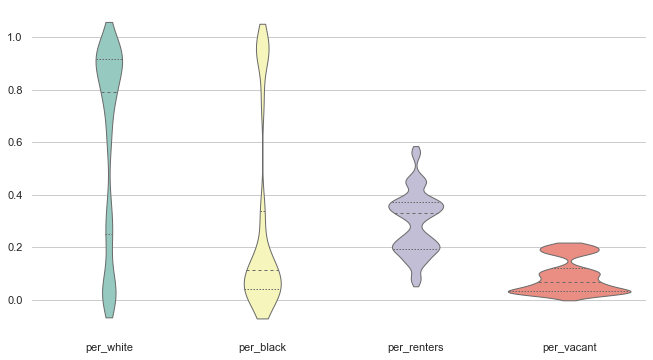

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=morans_hh_0010_census_sub[['per_white','per_black','per_renters', 'per_vacant']],split=True,palette="Set3",  bw=.2, cut=1,linewidth=1,inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)


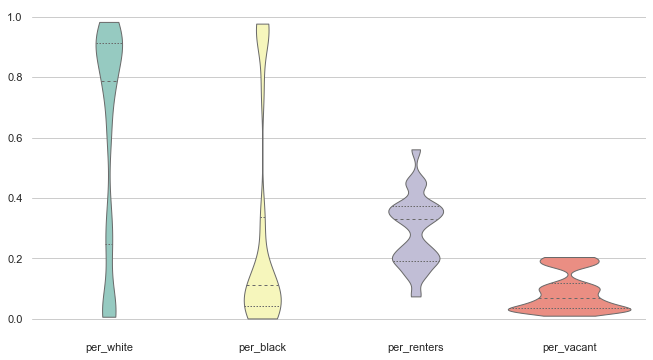

In [178]:


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=morans_hh_0010_census_sub[['per_white','per_black','per_renters', 'per_vacant']],split=True,palette="Set3",  bw=.2, cut=0,linewidth=1,inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)



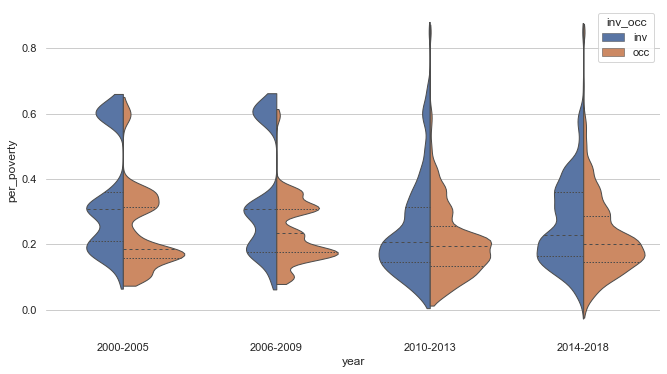

In [184]:



import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(11, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_poverty',hue='inv_occ',data=violin0018,split=True,  bw=.2, cut=1,linewidth=1,inner="quart")
# ax.set(ylim=(0, 1))
sns.despine(left=True, bottom=True)

plt.savefig("data/02_flip-investigations_data/CHARTS/210714/Violin-poverty.png")


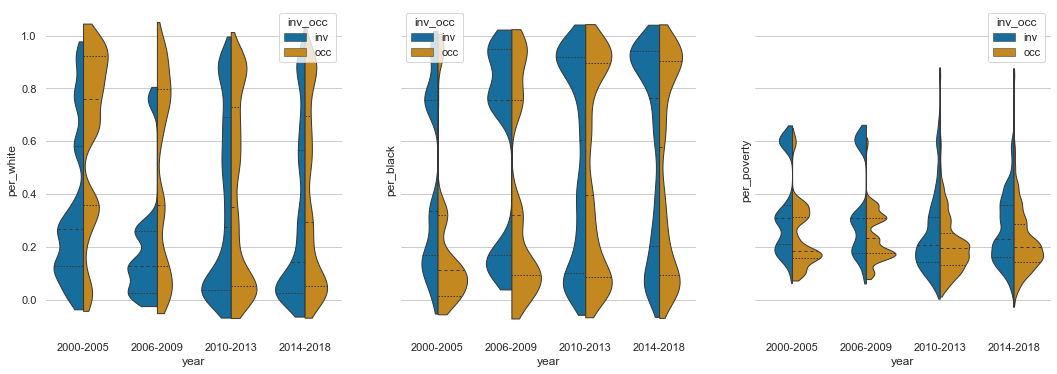

In [186]:


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(1,3,figsize=(18, 6),sharex=True,sharey=True)

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='per_white',hue='inv_occ',data=violin0018,split=True, 
               bw=.2, cut=1,linewidth=1,inner="quart", palette='colorblind',ax = ax[0])
sns.despine(left=True, bottom=True)

sns.violinplot(x='year',y='per_black',hue='inv_occ',data=violin0018,split=True, 
               bw=.2, cut=1,linewidth=1, palette='colorblind',inner="quart", ax = ax[1])
sns.despine(left=True, bottom=True)

sns.violinplot(x='year',y='per_poverty',hue='inv_occ',data=violin0018,split=True, 
               bw=.2, cut=1,linewidth=1,inner="quart", palette='colorblind', ax = ax[2])
sns.despine(left=True, bottom=True)

#f.savefig("02_outputs/complete_drafts/violin_demographics_race_pov_blocks_alt.svg")
plt.savefig("data/02_flip-investigations_data/CHARTS/210714/Violin-Demos.png")




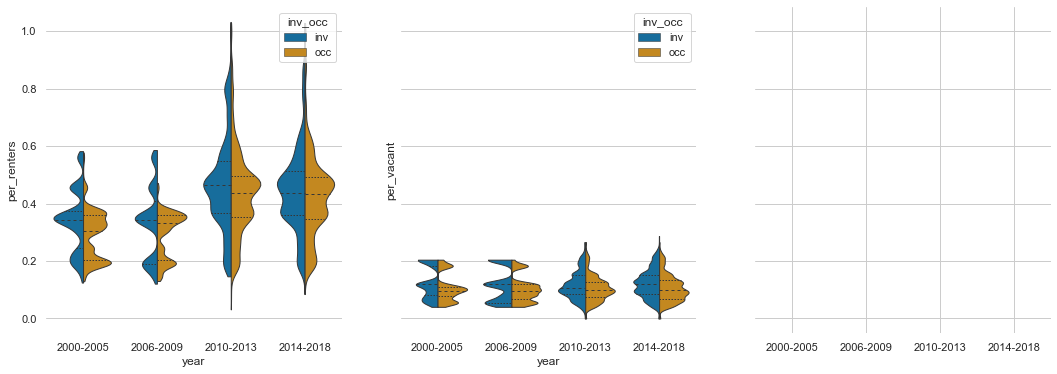

In [190]:


f, ax = plt.subplots(1,3,figsize=(18, 6),sharex=True, sharey=True)

sns.violinplot(x='year',y='per_renters',hue='inv_occ',data=violin0018,split=True, 
               bw=.2, cut=1,linewidth=1,inner="quart", palette='colorblind', ax = ax[0])
sns.despine(left=True, bottom=True)
sns.violinplot(x='year',y='per_vacant',hue='inv_occ',data=violin0018,split=True, 
               bw=.2, cut=0,linewidth=1,palette='colorblind',inner="quart", ax = ax[1])
sns.despine(left=True, bottom=True)

#f.savefig("02_outputs/complete_drafts/violin_demographics_tenure_blocks_alt.svg")
plt.savefig("data/02_flip-investigations_data/CHARTS/210714/Violin-RentVacant.png")




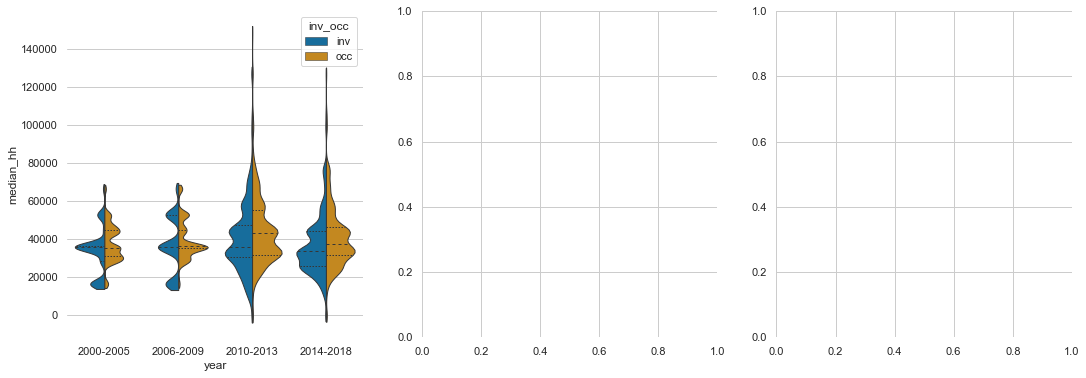

In [191]:
f, ax = plt.subplots(1,3,figsize=(18, 6))

# # Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x='year',y='median_hh',hue='inv_occ',data=violin0018,split=True, 
               bw=.2, cut=1,linewidth=1,inner="quart", palette='colorblind',ax=ax[0])
sns.despine(left=True, bottom=True)
#f.savefig("02_outputs/complete_drafts/violin_demographics_income_blocks_alt.svg")
plt.savefig("data/02_flip-investigations_data/CHARTS/210714/Violin-MedianHH.png")

